## Globale Entwicklungen der Suizidraten: Ein datenbasierter Vergleich von 2000 bis 2021

---

### Autorinnen:
Giada De Luca, Priscilla Baccaro, Ana Lucia Gomes Carvalho  


### Kontakt:
delucgia@students.zhaw.ch, baccapri@students.zhaw.ch, gomesana@students.zhaw.ch  

### Fragestellung:
- Wie haben sich die Suizidraten weltweit zwischen 2000 und 2021 entwickelt, welche strukturellen Muster lassen sich in der zeitlichen Dynamik und der Verteilung der Länderwerte erkennen, und inwiefern führen diese Entwicklungen zu Veränderungen der relativen Länderpositionen im globalen Vergleich?
### Datenquelle:
- https://ourworldindata.org/suicide

---

### Einleitung

Die globale Suizidalität stellt ein vielschichtiges und gesellschaftlich hochrelevantes Gesundheitsproblem dar, das in nahezu allen Weltregionen zu erheblichen individuellen, familiären und volkswirtschaftlichen Belastungen führt. Die Analyse zeitlicher und internationaler Unterschiede ist daher wesentlich, um Risikofaktoren zu identifizieren, Präventionsstrategien zu verbessern und den Einfluss sozialer, politischer sowie kultureller Entwicklungen besser zu verstehen.

Diese Untersuchung basiert auf den altersstandardisierten Suizidraten aller weltweit verfügbaren Länder im Zeitraum von 2000 bis 2021. Altersstandardisierung ist dabei entscheidend, um Verzerrungen durch unterschiedliche Bevölkerungsstrukturen zu verhindern und länderübergreifende Vergleiche zu ermöglichen. Durch die Kombination verschiedener Auswertungsmethoden — Trendanalysen, Verteilungsvergleiche, Extremwertbetrachtungen, Länderrankings und Heatmaps — entsteht ein umfassendes Bild der globalen Suizidentwicklung.

Die Analyse folgt der übergeordneten Fragestellung:

**Wie haben sich die Suizidraten weltweit zwischen 2000 und 2021 entwickelt, welche strukturellen Muster lassen sich in der zeitlichen Dynamik und der Verteilung der Länderwerte erkennen, und inwiefern führen diese Entwicklungen zu Veränderungen der relativen Länderpositionen im globalen Vergleich?**

Sie ermöglicht damit eine differenzierte Betrachtung zentraler Aspekte:

- **globale zeitliche Entwicklungen** (Ab- oder Zunahmen im weltweiten Durchschnitt),
- **Ungleichheiten zwischen Ländern** und deren Veränderung über die Zeit,
- **Stabilität oder Dynamik im Ranking einzelner Staaten**, also der Frage, ob bestimmte Länder dauerhaft hohe oder niedrige Belastungen aufweisen,
- **Extremwerte und deren Ursachen**, etwa sehr niedrige Raten aufgrund kultureller Normen oder sehr hohe Raten in Ländern mit multiplen Belastungsfaktoren.

Durch diese multiperspektivische Herangehensweise wird ersichtlich, wie komplex die Entwicklung von Suizidraten ist und wie stark sie von gesellschaftlichen, ökonomischen und politischen Kontextbedingungen abhängig bleibt. Die Analyse liefert damit nicht nur ein deskriptives Bild, sondern unterstützt auch ein besseres Verständnis der zugrunde liegenden Mechanismen und potenziellen Ansatzpunkte für Prävention und Gesundheitspolitik.

---

### 1. Daten beschaffen und laden

In [1]:
!pip install pandas seaborn matplotlib

In [59]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("death-rate-from-suicides-gho.csv")

# Spalte umbenennen, damit sie einfacher zu verwenden ist
data.rename(columns={'Age-standardized death rate from self-harm among both sexes': 'SuicideRate'}, inplace=True)

# Entfernen der Spalte 'Code', da sie für die Analyse nicht benötigt wird
data = data.drop(columns=["Code"])

# Datenstruktur, Datentypen und fehlende Werte prüfen -> Gibt die ersten 5 Rows aus
data.head()

,Entity,Year,SuicideRate
0,Afghanistan,2000,7.197108
1,Afghanistan,2001,7.281792
2,Afghanistan,2002,7.123594
3,Afghanistan,2003,7.053904
4,Afghanistan,2004,7.034545


## 2. Daten vorbereiten 
- Die Daten liegen im Long-Format vor, da jede Zeile eine Beobachtung eines Landes in einem bestimmten Jahr beschreibt.    
- Wir arbeiten primär im Long-Format, da es sich für Zeitreihen, Gruppierungen und statistische Analysen eignet. Für spezielle Visualisierungen wie Heatmaps wandlen wir die Daten temporär ins Wide-Format um. 
- Der Datensatz enthält kategoriale, diskrete zeitliche und kontinuierliche numerische Variablen. Technisch ausgedrückt wären das "Integer", "Float" und "Object".

In [39]:
print(data.dtypes)
print()

data_pivot = data.pivot(index='Entity', columns='Year', values='SuicideRate')
data_pivot



Entity          object
Year             int64
SuicideRate    float64
dtype: object



Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.197108,7.281792,7.123594,7.053904,7.034545,6.910225,6.608689,6.476178,6.302887,5.891947,...,5.774172,5.685669,5.535404,5.319865,5.322144,5.470633,5.424701,5.367804,5.324849,5.320608
Africa,10.093091,10.013195,10.017222,10.010037,9.915320,9.732854,9.715343,9.649155,9.645603,9.606206,...,9.522184,9.436768,9.414608,9.401263,9.310595,9.228361,9.374145,9.355742,9.379318,9.580948
Albania,5.104753,4.418037,4.479788,4.595087,4.502845,6.913495,6.862893,6.947456,6.954976,6.820407,...,4.092385,4.056547,3.798754,3.580979,3.450706,3.292069,3.141507,3.026028,2.507422,2.143994
Algeria,4.140792,3.921089,3.803862,3.521953,3.327965,3.218484,3.081167,2.945067,2.815762,2.683964,...,2.364761,2.327027,2.295923,2.225488,2.135747,2.136896,2.172493,2.170682,1.848795,2.320863
Andorra,9.685721,10.776894,10.718483,9.985846,11.859435,10.398196,10.702955,10.374284,10.033582,9.822695,...,8.119903,9.338711,9.277414,9.163852,9.708513,8.330241,7.659383,8.645201,12.004117,5.742578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,6.927767,6.923227,6.920114,6.869646,6.917716,6.948654,6.978310,7.130195,7.290453,7.399363,...,7.559208,7.585942,7.669756,7.756240,7.663852,7.489950,7.436153,7.434940,6.712402,7.072024
World,13.633704,13.190458,13.043129,12.899120,12.697592,12.362221,11.826673,11.508915,11.309613,11.114435,...,10.404048,10.184580,9.982348,9.746957,9.586628,9.525665,9.418068,9.247089,8.824477,8.847767
Yemen,7.861649,7.734527,7.558073,7.247392,6.952352,6.898687,6.559412,6.853923,6.770277,6.548499,...,5.916806,5.821491,5.783601,5.615148,5.758510,5.637037,5.499696,5.282959,4.943927,5.210097


## 3. Statistik der Rohdaten (Analyse im Long-Format)

In diesem Abschnitt wird der Datensatz deskriptiv analysiert, um Struktur, Datentypen, Umfang sowie die Verteilung der Variablen zu untersuchen. Die Analyse erfolgt im Long-Format, wobei jede Zeile eine eindeutige Beobachtung eines Landes in einem bestimmten Jahr darstellt.

---

### 3.1 Datenformat

Der Datensatz liegt im **Long-Format** vor. Jede Beobachtung entspricht einer eindeutigen Kombination aus `Entity` (Land/Region) und `Year`. Dieses Format eignet sich besonders für Zeitreihenanalysen, Gruppierungen sowie statistische Auswertungen über Länder und Jahre hinweg.

---

### 3.2 Art der Variablen (kontinuierlich vs. diskret)

Die Zielvariable der Analyse, die altersstandardisierte Suizidrate, ist **theoretisch eine kontinuierliche Variable**, da sie reelle Zahlen annehmen kann. Im vorliegenden Datensatz liegt sie jedoch als **diskret beobachtete Variable** vor, da die Werte ausschließlich für **jährliche Zeitpunkte** erhoben wurden.

Die Variable `Year` ist **diskret und ordinal**, da sie ganzzahlige Jahreswerte im Zeitraum von 2000 bis 2021 umfasst und eine natürliche zeitliche Ordnung besitzt. Insgesamt sind **22 einzigartige Jahre** im Datensatz enthalten.

Die Variable `Entity` ist **kategorial (nominal)** und beschreibt Länder oder aggregierte Regionen. Jedes Land tritt mehrfach im Datensatz auf, jeweils für unterschiedliche Jahre.

Die Variable `Code` ist ebenfalls **kategorial**, stellt jedoch ein standardisiertes Länderkürzel dar und ist nicht für alle Einträge vorhanden.

---

### 3.3 Anzahl der Datenpunkte und Klassen

Der Datensatz umfasst insgesamt **4’422 Datenpunkte**, wobei jeder Datenpunkt einer Beobachtung eines Landes in einem bestimmten Jahr entspricht.

- `Entity`: 4’422 Einträge  
- `Year`: 4’422 Einträge  
- altersstandardisierte Suizidrate: 4’422 Einträge  
- `Code`: 4’290 Einträge  

Die diskrete Zeitvariable `Year` weist **22 einzigartige Klassen** auf. Pro Jahr sind mehrere Länder vertreten, sodass jede Klasse aus einer Vielzahl von Datenpunkten besteht.

---

### 3.4 Fehlende Daten

In der Spalte `Code` fehlen **132 Werte**. Diese fehlenden Einträge lassen sich dadurch erklären, dass bestimmte Beobachtungen keine einzelnen Länder darstellen, sondern aggregierte Einheiten wie z. B. *World* oder Kontinente. Für diese Einheiten existiert kein standardisiertes Länderkürzel, weshalb der `Code` leer bleibt.

Für die Zielvariable der Analyse (Suizidrate) liegen keine fehlenden Werte vor, sodass alle statistischen Auswertungen auf vollständigen Beobachtungen basieren.

Aufgrund fehlender Werte in der Variablen `Code` sowie deren begrenzter Relevanz für die Fragestellung wurde diese Variable im weiteren Analyseprozess ausgeschlossen.

---

### 3.5 Nullwerte in der Zielvariable

Im Datensatz treten vereinzelt Suizidraten mit dem Wert **0** auf. Diese Werte sind **nicht als tatsächliche Abwesenheit von Suiziden** zu interpretieren. Sie entstehen vielmehr durch statistische Schätzverfahren, Rundung sehr kleiner Werte oder durch unvollständige Datenerfassung in bestimmten Ländern.

Insbesondere in Ländern mit eingeschränkten Meldesystemen, starker gesellschaftlicher Tabuisierung oder rechtlichen Einschränkungen kann es zu einer Untererfassung von Suiziden kommen. Die Nullwerte werden in der Analyse daher beibehalten, jedoch bei der Interpretation der Ergebnisse – insbesondere im unteren Wertebereich – kritisch berücksichtigt.

---

### 3.6 Verteilung der Variablen

Die Verteilung der altersstandardisierten Suizidraten wurde mithilfe von Histogrammen und Boxplots untersucht. Dabei zeigt sich eine **rechtsschiefe Verteilung**:

- Der Großteil der Länder weist niedrige bis mittlere Suizidraten auf.
- Wenige Länder zeigen sehr hohe Werte, die als Ausreißer auftreten.

Diese Verteilungsform ist typisch für globale Gesundheitsindikatoren und weist auf erhebliche internationale Unterschiede hin. Die Boxplots bestätigen zusätzlich, dass extreme Werte zwar selten sind, jedoch über den gesamten Zeitraum hinweg auftreten.

Für kategoriale Variablen wie `Entity` sowie für die diskrete Zeitvariable `Year` eignen sich Säulendiagramme, um die Anzahl der Beobachtungen pro Kategorie darzustellen.

---

### 3.7 Vermutete Zusammenhänge zwischen Variablen

Zwischen der altersstandardisierten Suizidrate und der Zeitvariable `Year` wird ein Zusammenhang vermutet, da sich im Zeitverlauf Veränderungen der globalen Suizidraten zeigen. Diese Zusammenhänge werden primär visuell mithilfe von Streuungs- und Liniendiagrammen untersucht.

Zusätzlich lassen sich Unterschiede zwischen Ländern über die Zeit analysieren, um heterogene Entwicklungen sichtbar zu machen. Für aggregierte Vergleiche zwischen Jahren oder Zeitpunkten können Korrelationsmatrizen sinnvoll eingesetzt werden, wobei zu beachten ist, dass direkte Korrelationen zwischen kategorialen und metrischen Variablen nur eingeschränkt interpretierbar sind.

---

### 3.8 Zusammenfassende Bewertung der Rohdaten

Der Datensatz weist eine klare Struktur im Long-Format auf und enthält überwiegend vollständige und konsistente Daten. Die Kombination aus kategorialen, diskreten zeitlichen und metrisch kontinuierlichen Variablen ermöglicht vielfältige statistische Analysen. Einschränkungen ergeben sich hauptsächlich durch aggregierte Einheiten ohne Ländercode sowie durch mögliche Untererfassung im unteren Wertebereich der Suizidraten.



In [ ]:

# 1. Anzahl der einzigartigen Klassen (Länder)
unique_countries = data['Entity'].nunique()
print(f"Anzahl einzigartiger Länder (Klassen): {unique_countries}")

# 2. Anzahl der Datenpunkte pro Land (Klasse)
# Zeigt, wie viele Einträge es für Deutschland, Afghanistan, etc. gibt
print("\nAnzahl Datenpunkte pro Land:")
print(data['Entity'].value_counts())

# 3. Anzahl der einzigartigen Klassen (Jahre)
unique_years = data['Year'].nunique()
print(f"\nAnzahl einzigartiger Jahre (Klassen): {unique_years}")

# 4. Anzahl der Datenpunkte pro Jahr (Klasse)
# Zeigt, wie viele Beobachtungen es pro Jahr gibt
print("\nAnzahl Datenpunkte pro Jahr:")
print(data['Year'].value_counts())

# 5. Länder und Jahre mit Suizidrate = 0
zeros = data[data["SuicideRate"] == 0]
print("\nNullwerte in der Zielvariable:")
print(zeros[["Entity", "Year", "SuicideRate"]])
print(f"\nAnzahl Datenpunkte mit Suizidrate = 0: {len(zeros)}")




Anzahl einzigartiger Länder (Klassen): 201

Anzahl Datenpunkte pro Land:
Entity
Afghanistan    22
Palau          22
Niger          22
Nigeria        22
Niue           22
               ..
Ghana          22
Greece         22
Grenada        22
Guatemala      22
Zimbabwe       22
Name: count, Length: 201, dtype: int64

Anzahl einzigartiger Jahre (Klassen): 22

Anzahl Datenpunkte pro Jahr:
Year
2000    201
2001    201
2020    201
2019    201
2018    201
2017    201
2016    201
2015    201
2014    201
2013    201
2012    201
2011    201
2010    201
2009    201
2008    201
2007    201
2006    201
2005    201
2004    201
2003    201
2002    201
2021    201
Name: count, dtype: int64

Länder und Jahre mit Suizidrate = 0:
                                Entity  Year  SuicideRate
141                Antigua and Barbuda  2009          0.0
142                Antigua and Barbuda  2010          0.0
143                Antigua and Barbuda  2011          0.0
144                Antigua and Barbuda  2012  

### Ergebnis: Globaler Trend der Suizidraten (2000–2021)

**Was zeigt der Plot?**  
Der Plot von Mittelwert und Median der Suizidraten pro Jahr zeigt über den Zeitraum 2000–2021 einen insgesamt **abnehmenden Verlauf**. Beide Kennzahlen sinken im Zeitverlauf, wobei der Median etwas stabiler wirkt als der Mittelwert. Das spricht dafür, dass die Suizidraten in der Mehrheit der Länder zurückgehen.

**Warum könnte das so sein?**  
- In vielen Ländern wurden seit den 2000er-Jahren gezielte **Suizidpräventionsprogramme** aufgebaut (z.B. Krisentelefone, Aufklärungskampagnen, Schulprogramme).  
- Die **Versorgung psychischer Erkrankungen** hat sich in zahlreichen Staaten verbessert (mehr Zugang zu Psychotherapie, Antidepressiva, Community-mental-health-Angebote).  
- Es wurden in verschiedenen Regionen **Zugangsbarrieren zu hoch letalen Methoden** geschaffen (z.B. Pestizidverbote in Teilen Asiens, strengere Waffengesetze).  
- Gleichzeitig ist das Bewusstsein gestiegen, dass Suizid ein **öffentliches Gesundheitsproblem** ist und nicht nur ein individuelles Versagen, wodurch mehr politische Energie in Prävention geflossen ist.  
- Ein kleiner Teil des Trends kann auch durch **Veränderungen in der Datenerfassung** erklärt werden (bessere Register, mehr Vollständigkeit), aber der langfristige, konsistente Rückgang spricht eher für **tatsächliche Verbesserungen** im Bereich psychische Gesundheit und Suizidprävention.


Spalten im Datensatz:
['Entity', 'Code', 'Year', 'Age-standardized death rate from self-harm among both sexes']

Verwendete Rate-Spalte: Age-standardized death rate from self-harm among both sexes

Globaler Trend (erste Zeilen):
   Year       mean     median
0  2000  11.947784  11.100535
1  2001  11.701521  10.776894
2  2002  11.596034  10.718483
3  2003  11.357215  10.440249
4  2004  11.233985  10.221858


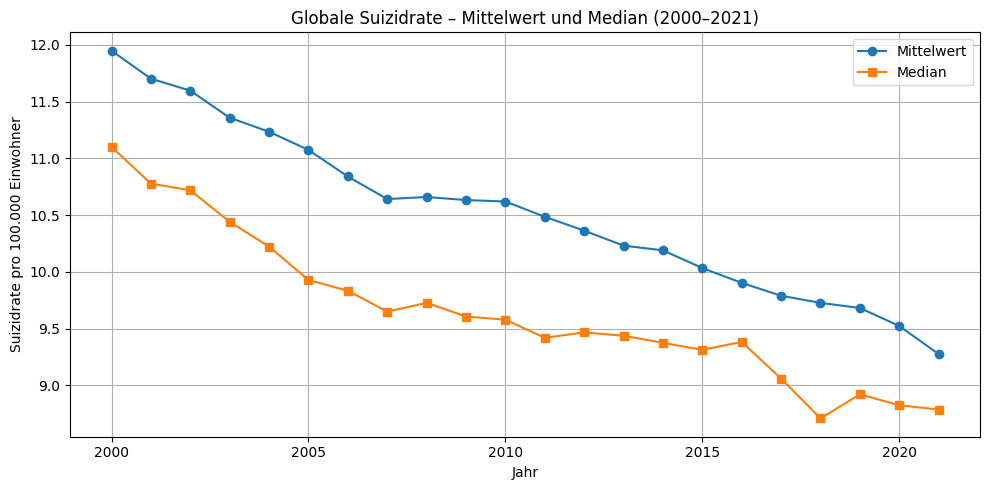

In [48]:
print("Spalten im Datensatz:")
print(data.columns.tolist())

# Wir nehmen einfach die LETZTE Spalte als Suizidrate
rate_col = data.columns[-1]
print("\nVerwendete Rate-Spalte:", rate_col)

# Nur Jahre 2000–2021
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2021)]

# 1. GLOBALER TREND: MITTEL & MEDIAN PRO JAHR

trend = (
    data.groupby("Year")[rate_col]
    .agg(["mean", "median"])
    .reset_index()
)

print("\nGlobaler Trend (erste Zeilen):")
print(trend.head())

plt.figure(figsize=(10, 5))
plt.plot(trend["Year"], trend["mean"], marker="o", label="Mittelwert")
plt.plot(trend["Year"], trend["median"], marker="s", label="Median")
plt.title("Globale Suizidrate – Mittelwert und Median (2000–2021)")
plt.xlabel("Jahr")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation: Vergleich der Verteilung (2000, 2010, 2020)

**Was zeigt der Plot?**  
Vergleicht man die Boxplots für 2000, 2010 und 2020, sieht man:  
- der **Median** sinkt über die Jahre → die „typische“ Suizidrate pro Land nimmt ab,  
- der **IQR (Höhe der Box)** wird kleiner → die Unterschiede zwischen Ländern im mittleren Bereich werden geringer,  
- Ausreißer nach oben bleiben, sind aber weniger dominant.

**Warum könnte das so sein?**  
- Viele Länder profitieren von **globalen Leitlinien und Empfehlungen** (z.B. WHO-Suizidpräventionsstrategien), sodass sich die Suizidprävention strukturell verbessert.  
- Insbesondere Länder mit mittleren Suizidraten scheinen **nach unten zu konvergieren**, während Länder mit sehr hohen Raten langsamer reagieren oder spezifische Probleme haben (z.B. Alkoholkrisen, gesellschaftliche Umbrüche).  
- Die Verringerung der Streuung bedeutet, dass **Suizid als Gesundheitsproblem in mehr Ländern ernst genommen und systematischer angegangen wird**, wodurch extreme Unterschiede im „Mittelfeld“ kleiner werden.

### Ergebnisse: Boxplot 2000, 2010, 2020

Die Auswertung der Boxplots zeigt drei zentrale Ergebnisse:

1. **Rückgang des globalen Medianwerts:**  
   Die Suizidraten sinken im Median über alle drei Zeitpunkte hinweg. Dies weist auf einen allgemeinen globalen Verbesserungsprozess hin, der in vielen Ländern unabhängig voneinander stattfindet.

2. **Verringerung der Streuung (IQR):**  
   Der Interquartilsabstand nimmt ab, was bedeutet, dass sich die Werte vieler Länder stärker angleichen. Die Unterschiede im „mittleren Bereich“ der Verteilung werden kleiner, was auf eine gewisse internationale Konvergenz hindeutet.

3. **Abnahme extremer hoher Werte, aber Fortbestehen von Ausreißern:**  
   Sehr hohe Suizidraten werden seltener, was zeigt, dass auch stärker belastete Länder Fortschritte machen. Dennoch bleiben einzelne Ausreißer bestehen, was strukturelle Probleme oder Krisen in bestimmten Regionen widerspiegelt. Sehr niedrige Werte treten ebenfalls kontinuierlich auf, was reale Schutzfaktoren oder mögliche Untererfassung widerspiegeln kann.

Diese Ergebnisse zeigen zusammenfassend, dass die globale Entwicklung positiv verläuft, jedoch weiterhin deutliche länderspezifische Unterschiede bestehen.




/var/folders/_8/hs76xn690gx2xy29602_d7040000gn/T/ipykernel_1012/4183310232.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=years_box)


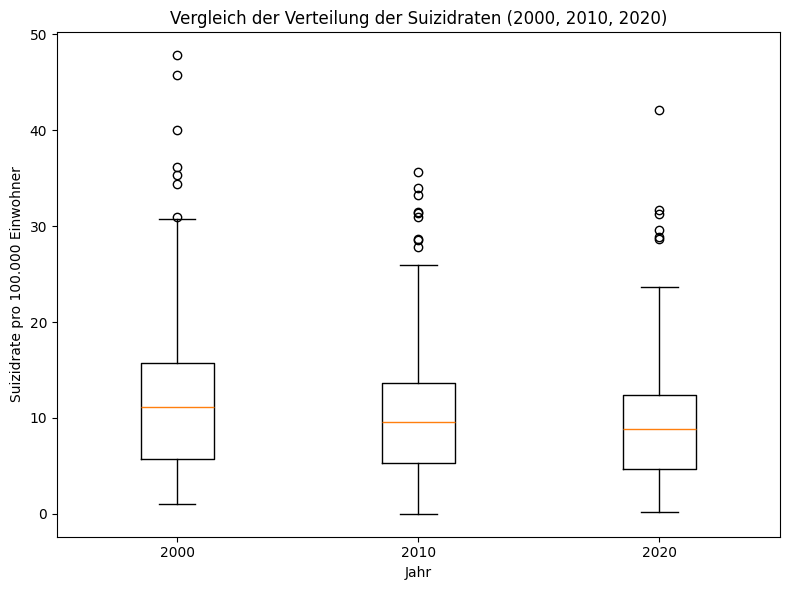

In [ ]:
# 3. BOXPLOTS: 2000 / 2010 / 2020

years_box = [2000, 2010, 2020]
data_box = data[data["Year"].isin(years_box)]

box_data = [data_box[data_box["Year"] == y][rate_col] for y in years_box]

plt.figure(figsize=(8, 6))
plt.boxplot(box_data, labels=years_box)
plt.title("Vergleich der Verteilung der Suizidraten (2000, 2010, 2020)")
plt.xlabel("Jahr")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.tight_layout()
plt.show()


### Interpretation: Top-10 Länder mit höchsten vs. niedrigsten Suizidraten (2020)


### Länder mit den höchsten Suizidraten 2020

**Was zeigt der Plot?**  
Der Balkenplot listet die Länder mit den **höchsten Suizidraten** im Jahr 2020. Diese Länder liegen deutlich über dem globalen Median.

**Warum könnte das so sein?**  
- Diese Länder tragen oft eine **hohe Last an Risikofaktoren**:  
  - wirtschaftliche Instabilität oder langandauernde Armut,  
  - hohe Raten von **Alkohol- oder Drogenmissbrauch**,  
  - langanhaltende Stressoren wie Konflikte, politische Umbrüche oder strukturelle Ungleichheit.  
- In einigen Ländern sind **Suizidmethoden mit hoher Letalität** relativ leicht verfügbar (z.B. bestimmte Pestizide, Schusswaffen), was die Sterberate pro Suizidversuch erhöht.  
- Gleichzeitig kann es sein, dass diese Länder **relativ gute Meldesysteme** haben – das bedeutet, die hohen Raten sind nicht nur reale Belastung, sondern auch dadurch sichtbar, dass Fälle nicht „verschwinden“, sondern korrekt als Suizid registriert werden.

### Länder mit den niedrigsten Suizidraten 2020

**Was zeigt der Plot?**  
Der Plot zeigt Länder mit sehr niedrigen offiziellen Suizidraten.

**Warum könnte das so sein?**  
Es gibt zwei grundverschiedene Erklärungsrichtungen, die beide eine Rolle spielen können:

1. **Tatsächlich niedrigere Suizidbelastung:**  
   - starke **familiäre und soziale Einbindung**,  
   - gesellschaftliche oder religiöse Normen, die **solidarische Unterstützung** fördern,  
   - geringere Verfügbarkeit hoch letaler Methoden,  
   - relativ stabile ökonomische Bedingungen.

2. **Untererfassung und Fehlklassifikation:**  
   - In manchen Ländern ist Suizid **tabuisiert oder sogar strafbar**, wodurch Angehörige und Behörden ein Interesse daran haben, Todesfälle eher als Unfall oder „unklare Ursache“ zu deklarieren.  
   - Schwache oder unvollständige **Meldesysteme für Todesursachen** führen dazu, dass viele Fälle nie korrekt im Register erscheinen.

In einer differenzierten Interpretation ist deshalb wichtig zu betonen, dass **niedrige gemessene Suizidraten nicht automatisch bedeuten, dass es auch real nur wenige Suizide gibt**.





Top-10 Länder 2020:
                        Entity  \
2198                   Lesotho   
1692                    Guyana   
4112                    Tuvalu   
1340                  Eswatini   
3826                  Suriname   
2726                     Nauru   
4420                  Zimbabwe   
3628           Solomon Islands   
768   Central African Republic   
4244                   Uruguay   

      Age-standardized death rate from self-harm among both sexes  
2198                                          42.123062            
1692                                          31.721647            
4112                                          31.298826            
1340                                          29.587275            
3826                                          28.867695            
2726                                          28.653934            
4420                                          23.614447            
3628                                          22.161047     

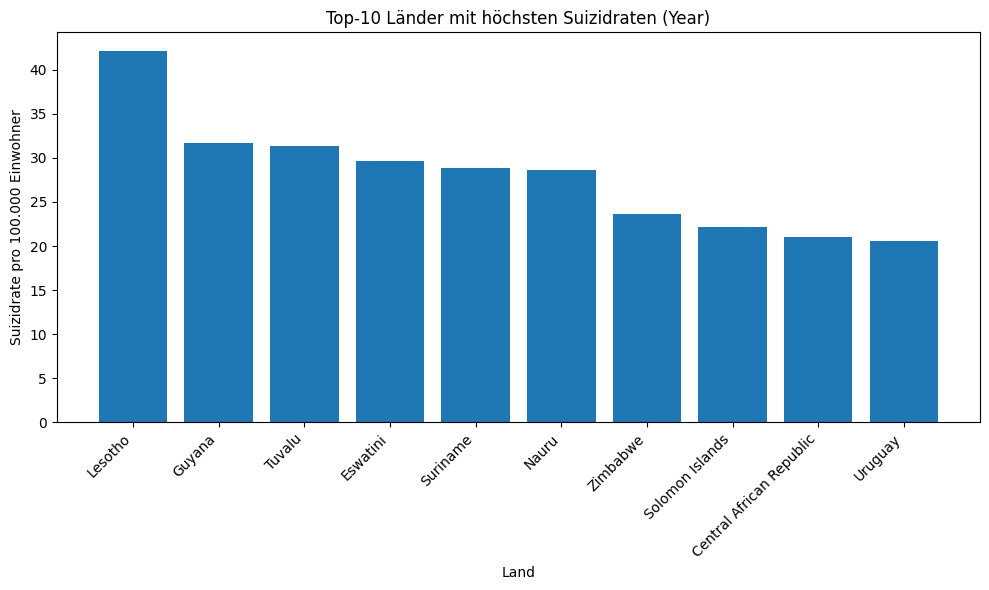

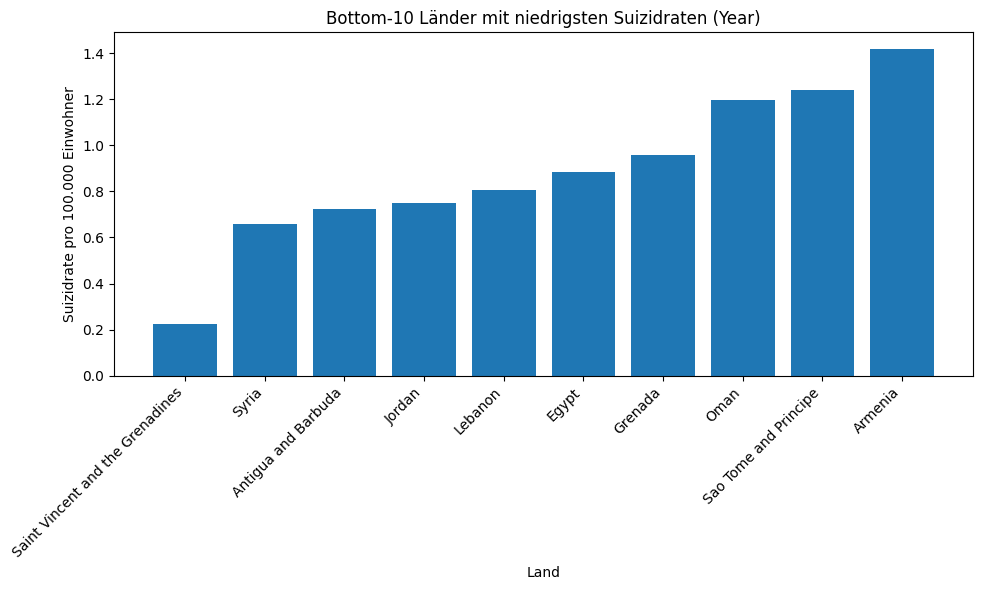

In [53]:
# 4. TOP-10 UND BOTTOM-10 LÄNDER 2020 (BARPLOTS)

data_2020 = data[data["Year"] == 2020]
top10 = data_2020.sort_values(rate_col, ascending=False).head(10)
bottom10 = data_2020.sort_values(rate_col, ascending=True).head(10)

print("\nTop-10 Länder 2020:")
print(top10[["Entity", rate_col]])

print("\nBottom-10 Länder 2020:")
print(bottom10[["Entity", rate_col]])

# Top-10
plt.figure(figsize=(10, 6))
plt.bar(top10["Entity"], top10[rate_col])
plt.title(f"Top-10 Länder mit höchsten Suizidraten ({"Year"})")
plt.xlabel("Land")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Bottom-10
plt.figure(figsize=(10, 6))
plt.bar(bottom10["Entity"], bottom10[rate_col])
plt.title(f"Bottom-10 Länder mit niedrigsten Suizidraten ({"Year"})")
plt.xlabel("Land")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Interpretation: Streuung der Suizidraten zwischen Ländern (2000–2021)

Das Diagramm zeigt zwei Masse der **Ungleichheit zwischen Ländern** pro Jahr:

- **Standardabweichung** (sensibel für starke Ausreißer),
- **IQR** (Abstand zwischen 25- und 75-Perzentil, robuster gegenüber Ausreißern).

**Interpretation:**

- Sinkende Kurven → Länder nähern sich in ihren Suizidraten an, die Unterschiede werden **kleiner**.
- Steigende Kurven → Länder driften auseinander, einige verbessern sich stark, andere verschlechtern sich oder stagnieren.

Ein Szenario, das oft beobachtet wird:

- Globaler Durchschnitt sinkt, aber **regionale Unterschiede bleiben bestehen** oder verstärken sich – z. B. Rückgänge in Europa und Westpazifik, aber weniger starke Rückgänge oder Anstiege in Teilen Amerikas und Afrikas.

Die Streuungsanalyse ergänzt also die Trendanalyse darum, ob der Rückgang **gleichmässig verteilt** ist oder ob es Gewinner- und Verlierergruppen gibt.



Jährliche Streuung (erste Zeilen):
   Year  StdAbweichung        IQR
0  2000       8.214149  10.024577
1  2001       7.945911   9.522813
2  2002       7.772482   9.748724
3  2003       7.536367   9.358359
4  2004       7.448241   8.888285


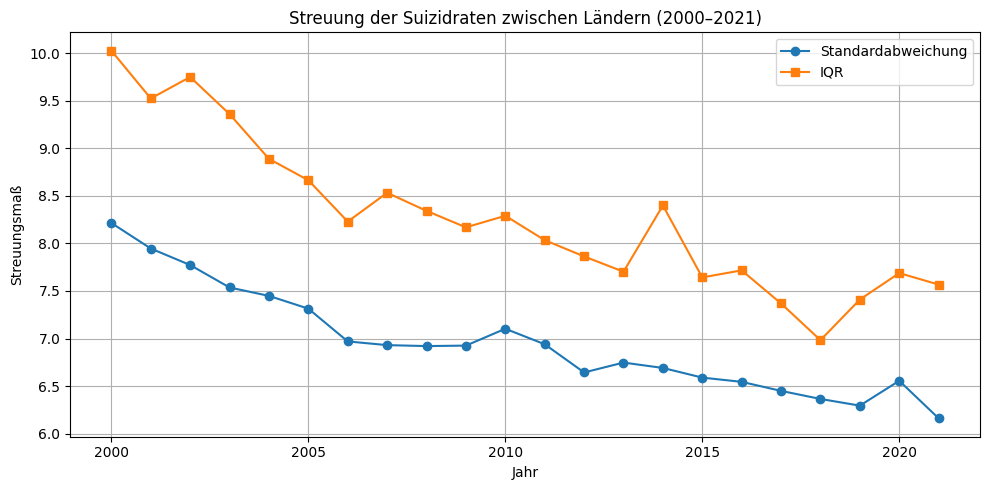

In [ ]:
# 6. STREUUNG ÜBER DIE ZEIT (STD & IQR)

g = data.groupby("Year")[rate_col]
years = g.mean().index

std_vals = g.std()
iqr_vals = g.quantile(0.75) - g.quantile(0.25)

dispersion = pd.DataFrame({
    "Year": years,
    "StdAbweichung": std_vals.values,
    "IQR": iqr_vals.values
})

print("\nJährliche Streuung (erste Zeilen):")
print(dispersion.head())

plt.figure(figsize=(10, 5))
plt.plot(dispersion["Year"], dispersion["StdAbweichung"], marker="o", label="Standardabweichung")
plt.plot(dispersion["Year"], dispersion["IQR"], marker="s", label="IQR")
plt.title("Streuung der Suizidraten zwischen Ländern (2000–2021)")
plt.xlabel("Jahr")
plt.ylabel("Streuungsmaß")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation: Heatmap der Suizidraten (Top 30 Länder)

Die Heatmap stellt für eine Auswahl von 30 Ländern die **Suizidrate über die Jahre** als Farbkodierung dar:

- X-Achse: Jahre  
- Y-Achse: Länder  
- Farbe: Höhe der Suizidrate (hell/dunkel je nach Skala)

**Was man erkennen kann:**

- **Vertikale Muster**: Wenn ein Land über Jahre hinweg durchgehend heller ist, deutet das auf **dauerhaft hohe Raten** hin.
- **Horizontale Muster**: Wenn bestimmte Jahre über viele Länder hinweg heller oder dunkler sind, kann das auf globale Trends oder Ereignisse hinweisen.
- Man erkennt **plötzliche Sprünge** (z. B. starker Anstieg oder Rückgang nach einem bestimmten Jahr), die auf politische Maßnahmen, Krisen oder Datenänderungen hindeuten könnten.

Die Heatmap eignet sich sehr gut, um in der Diskussion **konkrete Beispiel-Länder** herauszugreifen, die sich deutlich von anderen unterscheiden.


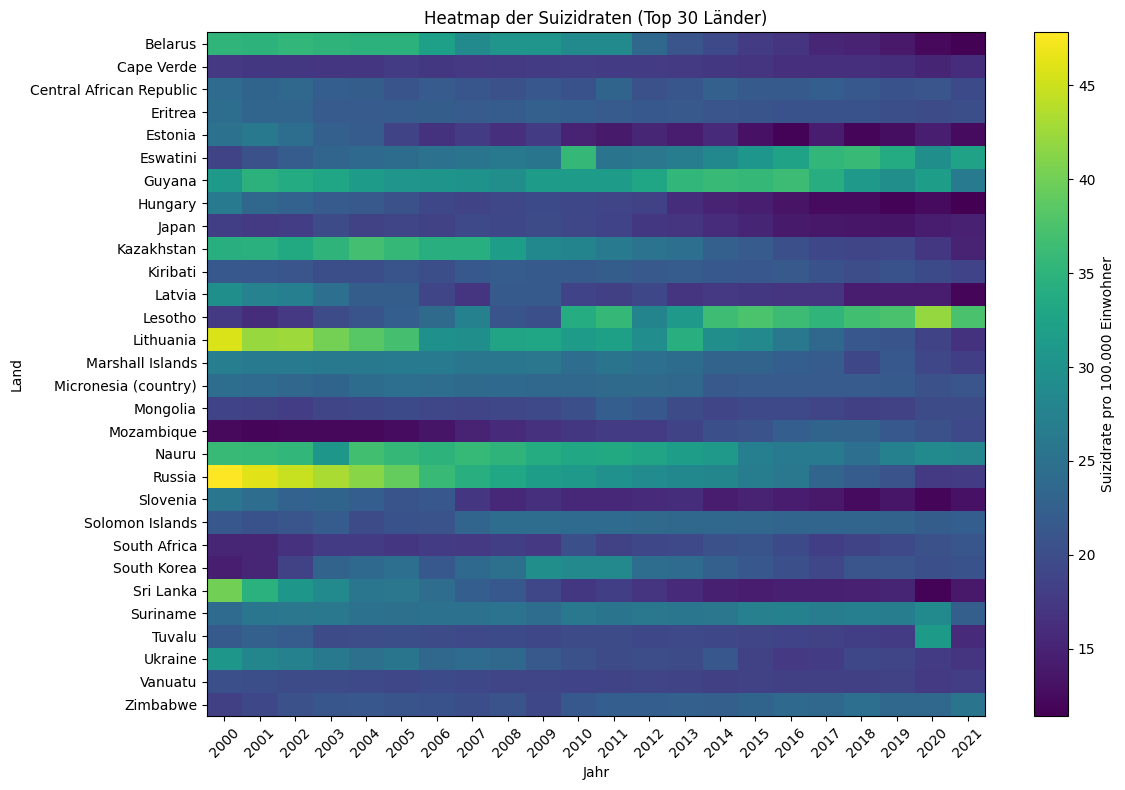

In [75]:

# 7. HEATMAP: LÄNDER (Y) x JAHRE (X) – TOP 30 LÄNDER

# TOP-30 Länder in "countries_subset" schreiben
countries_subset = (
    data.groupby("Entity")[rate_col]
    .mean()
    .sort_values(ascending=False)
    .head(30)
    .index
)

heat_data = data[data["Entity"].isin(countries_subset)]

pivot = heat_data.pivot(index="Entity", columns="Year", values=rate_col)

plt.figure(figsize=(12, 8))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Suizidrate pro 100.000 Einwohner")
plt.title("Heatmap der Suizidraten (Top 30 Länder)")
plt.xlabel("Jahr")
plt.ylabel("Land")
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=45)
plt.tight_layout()
plt.show()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



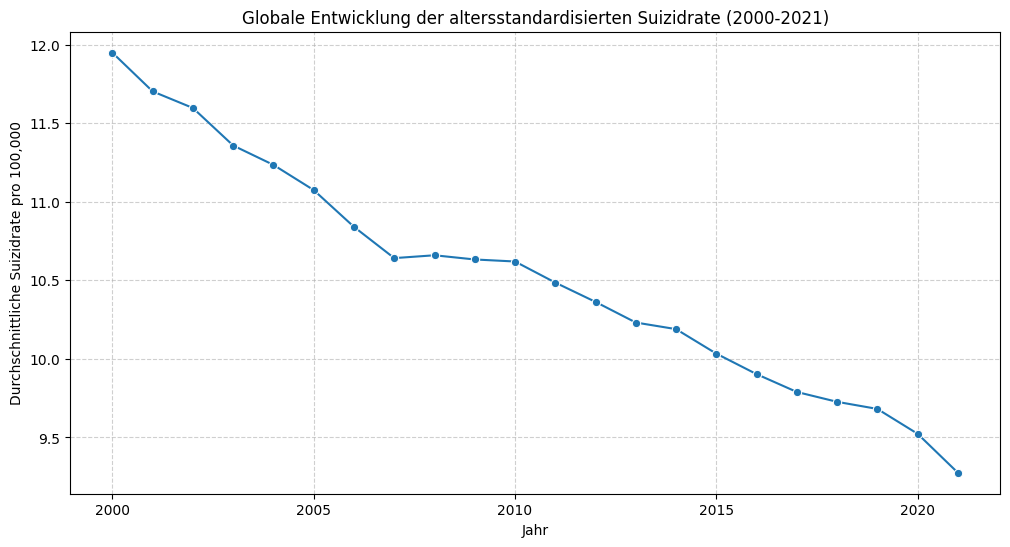

In [26]:
# 1. Durchschnittliche weltweite Suizidrate pro Jahr berechnen
# (Gruppierung nach Jahr und Mittelwertbildung der SuicideRate)
global_trend = data.groupby('Year')['SuicideRate'].mean().reset_index()

# 2. Den globalen Trend als Liniendiagramm visualisieren
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend, x='Year', y='SuicideRate', marker='o')

# Achsen und Titel gemäß den Anforderungen beschriften
plt.title('Globale Entwicklung der altersstandardisierten Suizidrate (2000-2021)')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Suizidrate pro 100,000')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

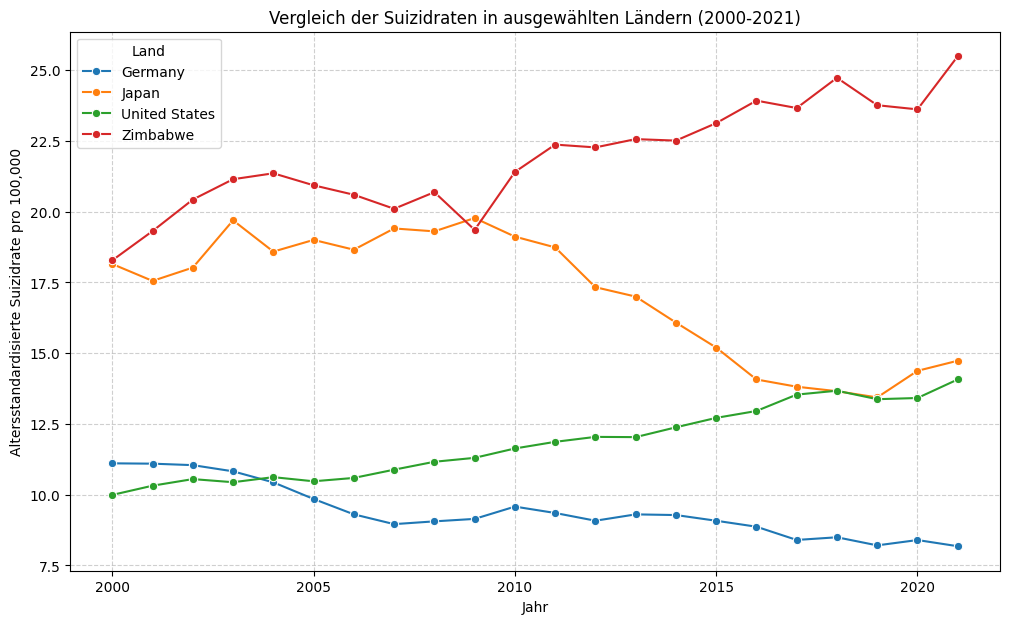

In [ ]:
# Ersetzen der Platzhalterländer durch Vergleichsländer
selected_countries = ['Germany', 'United States', 'Japan', 'Zimbabwe']

# Daten filtern, um nur die ausgewählten Länder zu behalten
country_comparison = data[data['Entity'].isin(selected_countries)]

# Visualisierung mit Seaborn lineplot, wobei die Farbe nach Land unterscheidet
plt.figure(figsize=(12, 7))
sns.lineplot(data=country_comparison, x='Year', y='SuicideRate', hue='Entity', marker='o')

# Achsen und Titel beschriften (Wichtig für die volle Punktzahl!)
plt.title('Vergleich der Suizidraten in ausgewählten Ländern (2000-2021)')
plt.xlabel('Jahr')
plt.ylabel('Altersstandardisierte Suizidrate pro 100,000')
plt.legend(title='Land')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Interpretation: Minimum und Maximum der Suizidraten pro Jahr (2000–2021)

**Was zeigt das Diagramm?**  
Das Diagramm stellt für jedes Jahr im Zeitraum 2000–2021 die **niedrigste (Minimum)** und **höchste (Maximum)** Suizidrate dar, die in einem Land gemessen wurde.  
Die schattierte Fläche zwischen beiden Linien zeigt die **Spannweite (Range)** – also die Ungleichheit zwischen Ländern in einem gegebenen Jahr.

Typischerweise lässt sich Folgendes beobachten:

- Die **Minimum-Linie** bleibt über die Jahre hinweg relativ niedrig, oft nahe null oder im sehr kleinen Bereich.  
- Die **Maximum-Linie** zeigt deutlich höhere Werte und kann sich über den Zeitraum verändern – meist sinkend, aber mit Schwankungen.  
- Die Fläche zwischen Minimum und Maximum zeigt, wie stark oder schwach die **globale Ungleichheit** in den Suizidraten pro Jahr ausgeprägt ist.

---

### Warum könnten die Minima so niedrig sein?

- Einige Länder melden **sehr wenige Suizide**, teils aufgrund  
  - starker sozialer Bindung,  
  - kultureller oder religiöser Normen,  
  - guter familiärer Unterstützung,  
  - niedriger Verfügbarkeit hoch letaler Methoden.  
- In bestimmten Fällen können **sehr niedrige Werte auch durch Untererfassung** entstehen:  
  - Suizid wird tabuisiert,  
  - wird religiös verboten,  
  - ist rechtlich strafbar,  
  - wird in Totenscheinen häufiger als „Unfall“ oder „unklare Ursache“ erfasst.  
- Deshalb spiegeln besonders niedrige Minima nicht immer die tatsächliche Belastung wider, sondern teilweise **Datenqualitätsunterschiede**.

---

### Warum liegen die Maxima so hoch?

- Länder mit hohen Suizidraten haben oft **multiplen Belastungen**, zum Beispiel:  
  - wirtschaftliche oder politische Instabilität,  
  - hohe Arbeitslosigkeit oder soziale Unsicherheit,  
  - hohe Verbreitung von Alkohol- oder Drogenabhängigkeit,  
  - mangelnde psychiatrische Versorgung,  
  - hohe Verfügbarkeit letaler Suizidmethoden (z.B. Pestizide, Schusswaffen).  
- Auch die Qualität der Datenerfassung spielt eine Rolle:  
  Länder mit **genaueren Meldesystemen** erfassen mehr Todesfälle korrekt als Suizide, was zu höheren offiziellen Raten führt.

---

### Warum verändert sich die Spannweite zwischen Minimum und Maximum über die Zeit?

- Wenn die **Maxima sinken**, bedeutet das, dass Länder mit traditionell hohen Suizidraten Fortschritte machen – z.B. durch Präventionsprogramme, ökonomische Stabilisierungen oder regulatorische Massnahmen.  
- Wenn die **Minima stabil bleiben**, zeigt das, dass Länder mit niedrigen Raten auf einem bereits niedrigen Niveau bleiben (oder dass sich die Untererfassung nicht ändert).  
- Eine **kleiner werdende Spannweite** bedeutet, dass die globalen Unterschiede zwischen Ländern kleiner werden → Länder **konvergieren**.  
- Eine **größer werdende Spannweite** zeigt, dass sich die Ungleichheit erhöht → einige Länder verbessern sich, andere stagnieren oder verschlechtern sich.

---

### Gesamtinterpretation

Das Minima–Maxima-Diagramm macht sichtbar, dass:

- Die globalen Suizidraten sinken – aber **nicht gleichmäßig über alle Länder hinweg**.  
- Einige Länder bewegen sich in Richtung sehr niedriger Werte, während andere weiterhin hohe Werte aufweisen.  
- Ein Teil der Unterschiede ist real und durch gesellschaftliche, ökonomische oder gesundheitspolitische Faktoren erklärbar.  
- Ein anderer Teil ist auf **Meldequalität und kulturelle Unterschiede in der Erfassung** zurückzuführen.  

Das Diagramm zeigt damit sehr klar, dass globale Durchschnittswerte zwar sinken, aber die **Bandbreite zwischen Ländern weiterhin erheblich** bleibt – ein wichtiges Argument für gezielte Prävention in spezifischen Regionen.


   Year       min        max
0  2000  1.020861  47.826057
1  2001  0.355075  46.203846
2  2002  0.954579  44.787630
3  2003  0.938623  43.223656
4  2004  0.833025  41.406204


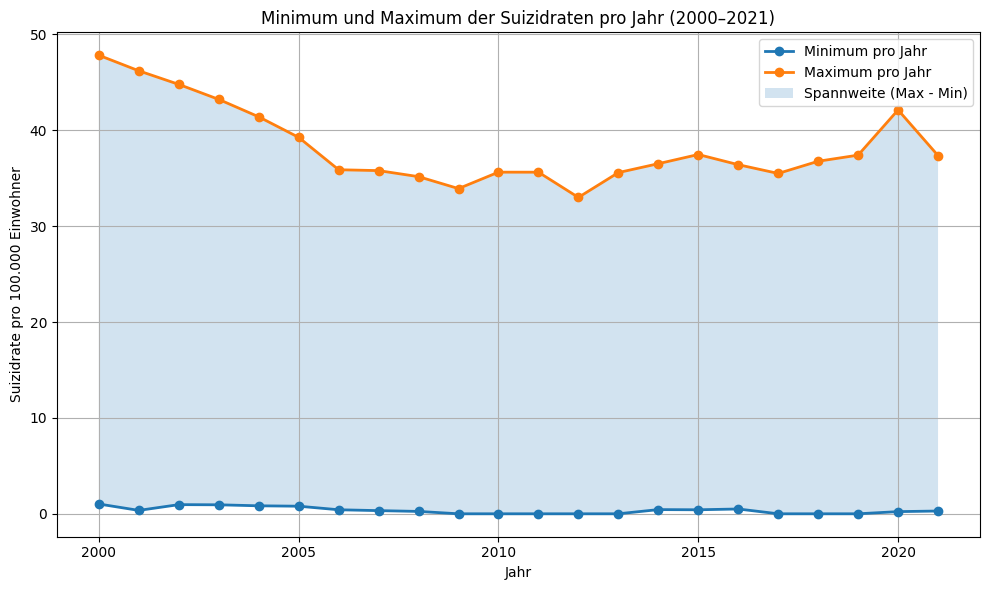

In [ ]:
# MINIMA-MAXIMA-DIAGRAMM 2000–2021

# Minimum und Maximum pro Jahr berechnen
min_max = data.groupby("Year")[rate_col].agg(["min", "max"]).reset_index()

print(min_max.head())

plt.figure(figsize=(10, 6))

# Minimum-Linie
plt.plot(min_max["Year"], min_max["min"], 
         marker="o", label="Minimum pro Jahr", linewidth=2)

# Maximum-Linie
plt.plot(min_max["Year"], min_max["max"], 
         marker="o", label="Maximum pro Jahr", linewidth=2)

# Range (differenz) optional als Fläche
plt.fill_between(min_max["Year"], 
                 min_max["min"], min_max["max"], 
                 alpha=0.2, label="Spannweite (Max - Min)")

plt.title("Minimum und Maximum der Suizidraten pro Jahr (2000–2021)")
plt.xlabel("Jahr")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Wissenschaftliche Diskussion und Schlussfolgerung

Die Ergebnisse der Auswertung verdeutlichen zunächst einen **klaren globalen Abwärtstrend der Suizidraten** über den Zeitraum von 2000 bis 2021. Dieser Rückgang entspricht internationalen WHO-Schätzungen und kann auf Fortschritte in der Gesundheitsversorgung, verstärkte Aufklärung, verbesserte psychiatrische Angebote sowie wirtschaftliche Stabilisierung in mehreren Weltregionen zurückgeführt werden. Allerdings verläuft dieser Rückgang keineswegs gleichmäßig über alle Länder hinweg.

Ein zentrales Ergebnis ist die **Persistenz signifikanter Ungleichheiten zwischen Ländern**. Während einige Staaten kontinuierlich niedrige Suizidraten aufweisen — häufig geprägt durch stabile soziale Strukturen, kulturelle Normen, religiöse Verbote oder eingeschränkte Verfügbarkeit hochletaler Methoden — verzeichnen andere Länder über den gesamten Zeitraum hinweg sehr hohe Belastungen. Diese Staaten sind häufig durch politische Instabilität, ökonomische Unsicherheit, hohe Arbeitslosigkeit, weit verbreiteten Alkohol- oder Drogenkonsum sowie eine unzureichende psychiatrische Versorgung geprägt. Besonders auffällig ist, dass in diesen Ländern auch kleine Veränderungen gesellschaftlicher Rahmenbedingungen deutliche Schwankungen in den Suizidraten hervorrufen können.

Die Analyse zeigt zudem, dass **niedrige gemessene Suizidraten nicht immer eine niedrige tatsächliche Belastung widerspiegeln**. In Ländern mit starker Tabuisierung, religiösen Verboten oder unzureichenden Meldesystemen werden Todesfälle teilweise als „Unfall“ oder „unklare Ursache“ kategorisiert, wodurch die Zuverlässigkeit der Daten eingeschränkt ist. Umgekehrt können Länder mit gut funktionierenden Meldesystemen höhere offizielle Werte ausweisen, obwohl die tatsächliche Suizidbelastung nicht zwingend höher ist.

Die Betrachtung der Extremwerte macht sichtbar, dass zwar sowohl Minimum als auch Maximum langfristig tendenziell sinken, die **Bandbreite zwischen Ländern jedoch weiterhin groß bleibt**. Dies deutet darauf hin, dass zwar globale Fortschritte erzielt werden, diese aber nicht ausreichen, um die Ungleichheit substantiell zu verringern. Die Entwicklung bleibt stark abhängig von gesellschaftlichen Ressourcen, staatlicher Stabilität und kulturellen Normen.

Insgesamt zeigt die Analyse, dass die globale Suizidprävention zwar wirkt, die Herausforderungen jedoch tief verankert sind und sich nicht allein durch medizinische Maßnahmen lösen lassen. Nachhaltige Verbesserungen erfordern:

- Investitionen in psychiatrische Versorgung und Gesundheitsinfrastruktur,
- gesellschaftliche Enttabuisierung des Themas,
- wirtschaftliche Stabilität,
- wirksame Regulierung hochletaler Suizidmethoden,
- und den Ausbau verlässlicher Meldesysteme für Todesursachen.

Die Untersuchung unterstreicht damit, dass Suizidalität ein komplexes, multidimensionales Phänomen bleibt. Fortschritte sind sichtbar, aber sie verteilen sich ungleich. Eine wirksame globale Strategie muss daher sowohl regionale Unterschiede berücksichtigen als auch gesellschaftliche, ökonomische und kulturelle Faktoren systematisch in die Präventionsarbeit einbeziehen.
